In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from analysis.classes import Country

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 5)

In [2]:
country = Country('usa')
df = country.data  # Pandas df object, that contains the data from the db.

In [3]:
print("Part 1: Intro")

Part 1: Intro


In [4]:
print(country)


Countries name: Usa
Countries id: 1
Continent: North America
Continent id: 1
Population: 331171664
First update: 2020-08-02
Last update: 2020-11-14
Data number of rows: 90
Data number of columns: 18
Columns: 
['scrap_date', 'scrap_time', 'update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [5]:
print(df.head(5))

  scrap_date scrap_time  ... TotalTests  Tests_1Mpop
0 2020-08-02   20:00:00  ...   59259593       178939
1 2020-08-08   20:00:00  ...   64096129       193525
2 2020-08-12   20:00:00  ...   66944595       202112
3 2020-08-16   20:00:00  ...   70228171       212012
4 2020-08-17   20:00:00  ...   71149490       214790

[5 rows x 18 columns]


In [6]:
print(df.dtypes,'\n')

scrap_date         datetime64[ns]
scrap_time                 object
update_time_GMT            object
Country_id                  int64
Country                    object
                        ...      
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
Length: 18, dtype: object 



In [7]:
print('Number of null values are:\n',df.isnull().sum())

Number of null values are:
 scrap_date          0
scrap_time          0
update_time_GMT    59
Country_id          0
Country             0
                   ..
SeriousCritical     0
Tot_Cases_1Mpop     0
Deaths_1Mpop        0
TotalTests          0
Tests_1Mpop         0
Length: 18, dtype: int64


In [8]:
print("Part 2: Basic exploring")

Part 2: Basic exploring


In [9]:
print("Q1.Find the date of the day with the highest New Cases.")
date = df[df['NewCases'] == df['NewCases'].max()]['scrap_date'].dt.date
print('Answer:\n', date, '\n')

Q1.Find the date of the day with the highest New Cases.
Answer:
 1    2020-08-08
Name: scrap_date, dtype: object 



Q2.Visualize the data for October
Total time taken in monthly_plot function is: 0.0013333333333333333 minutes.


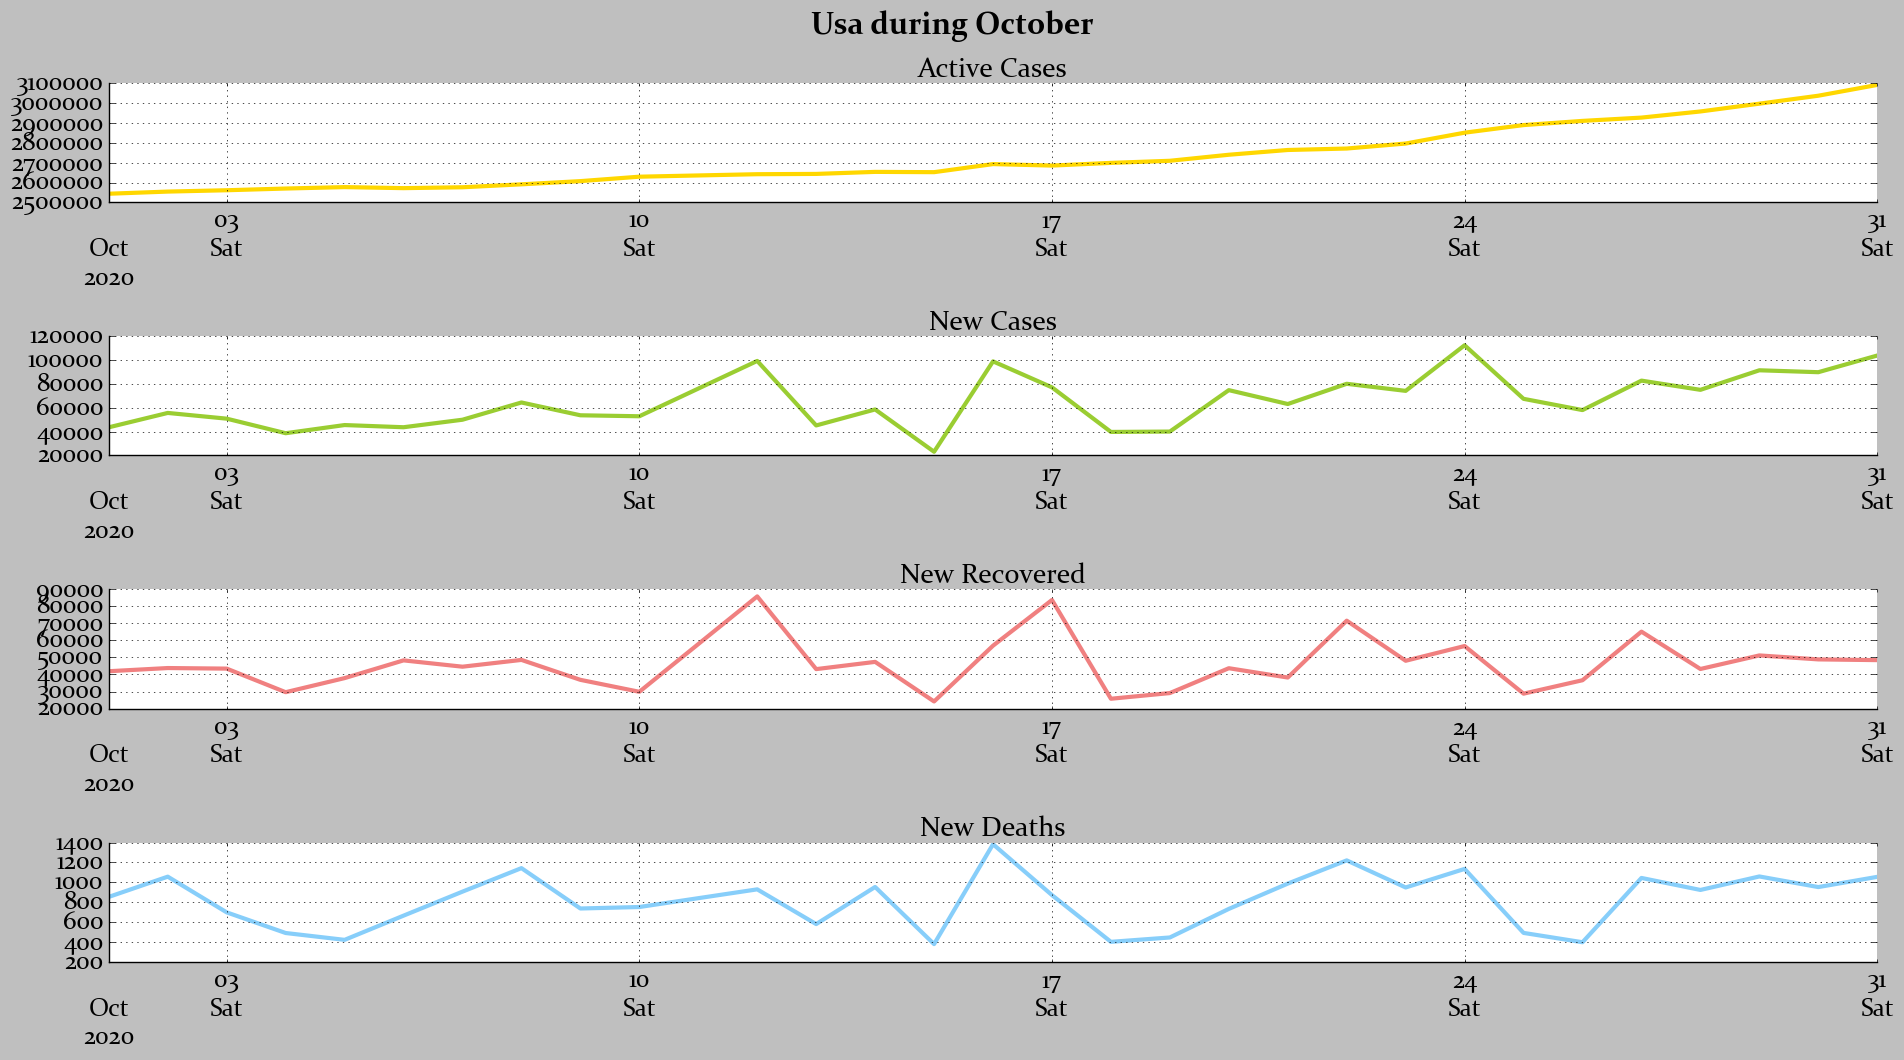

In [10]:
print("Q2.Visualize the data for October")
country.monthly_plot(['ActiveCases','NewCases','NewRecovered','NewDeaths'],10,2020)

Q3.Find the countries daily increases in death,recoveries,active cases,new cases
Total time taken in daily_increase function is: 0.009133333333333334 minutes.
Answer:
 85    1.734151
86    0.130890
87   -0.207672
88    0.107679
89    0.125094
Name: NewDeaths, dtype: float64 



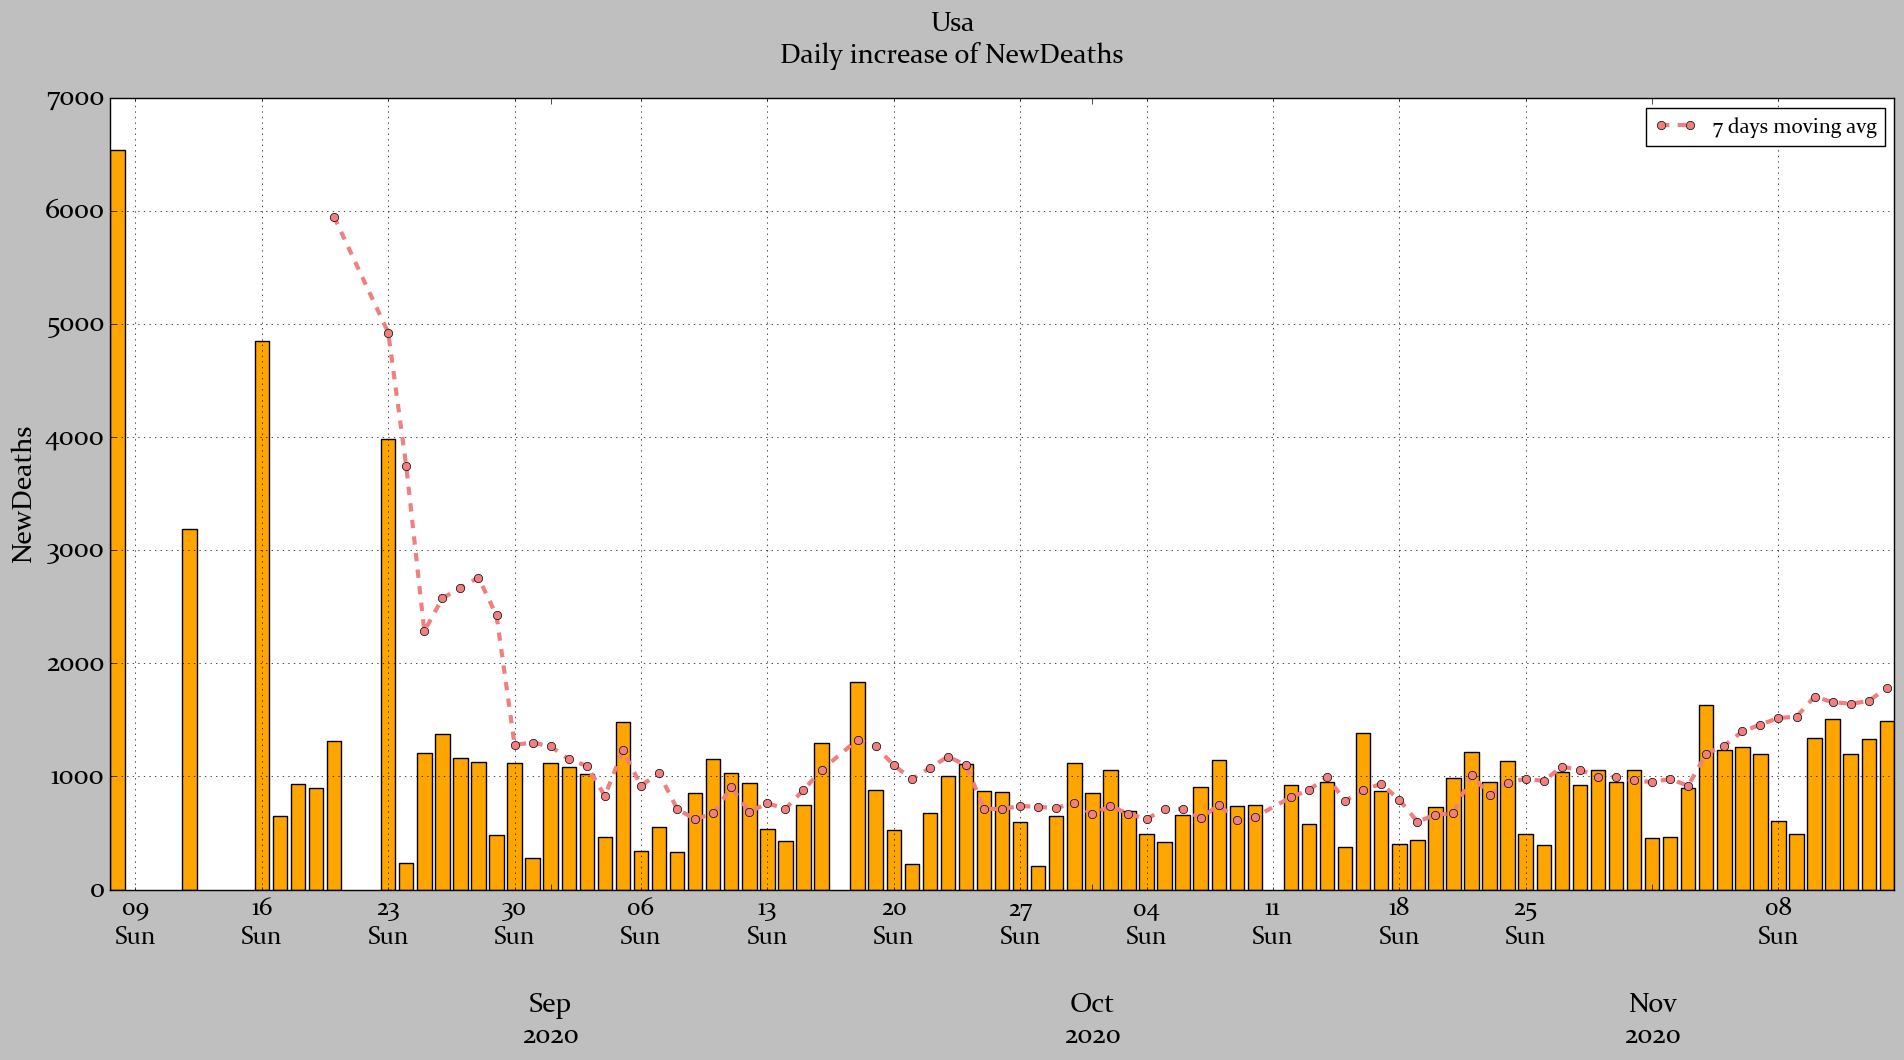

In [11]:
print("Q3.Find the countries daily increases in death,recoveries,active cases,new cases")
death_rate = df['NewDeaths'].pct_change()
country.daily_increase('NewDeaths', save = True)
print('Answer:\n', death_rate.tail(5), '\n')

Total time taken in daily_increase function is: 0.008633333333333333 minutes.
Answer:
 85    0.109314
86   -0.274817
87    0.244012
88    0.380541
89   -0.126993
Name: NewRecovered, dtype: float64 



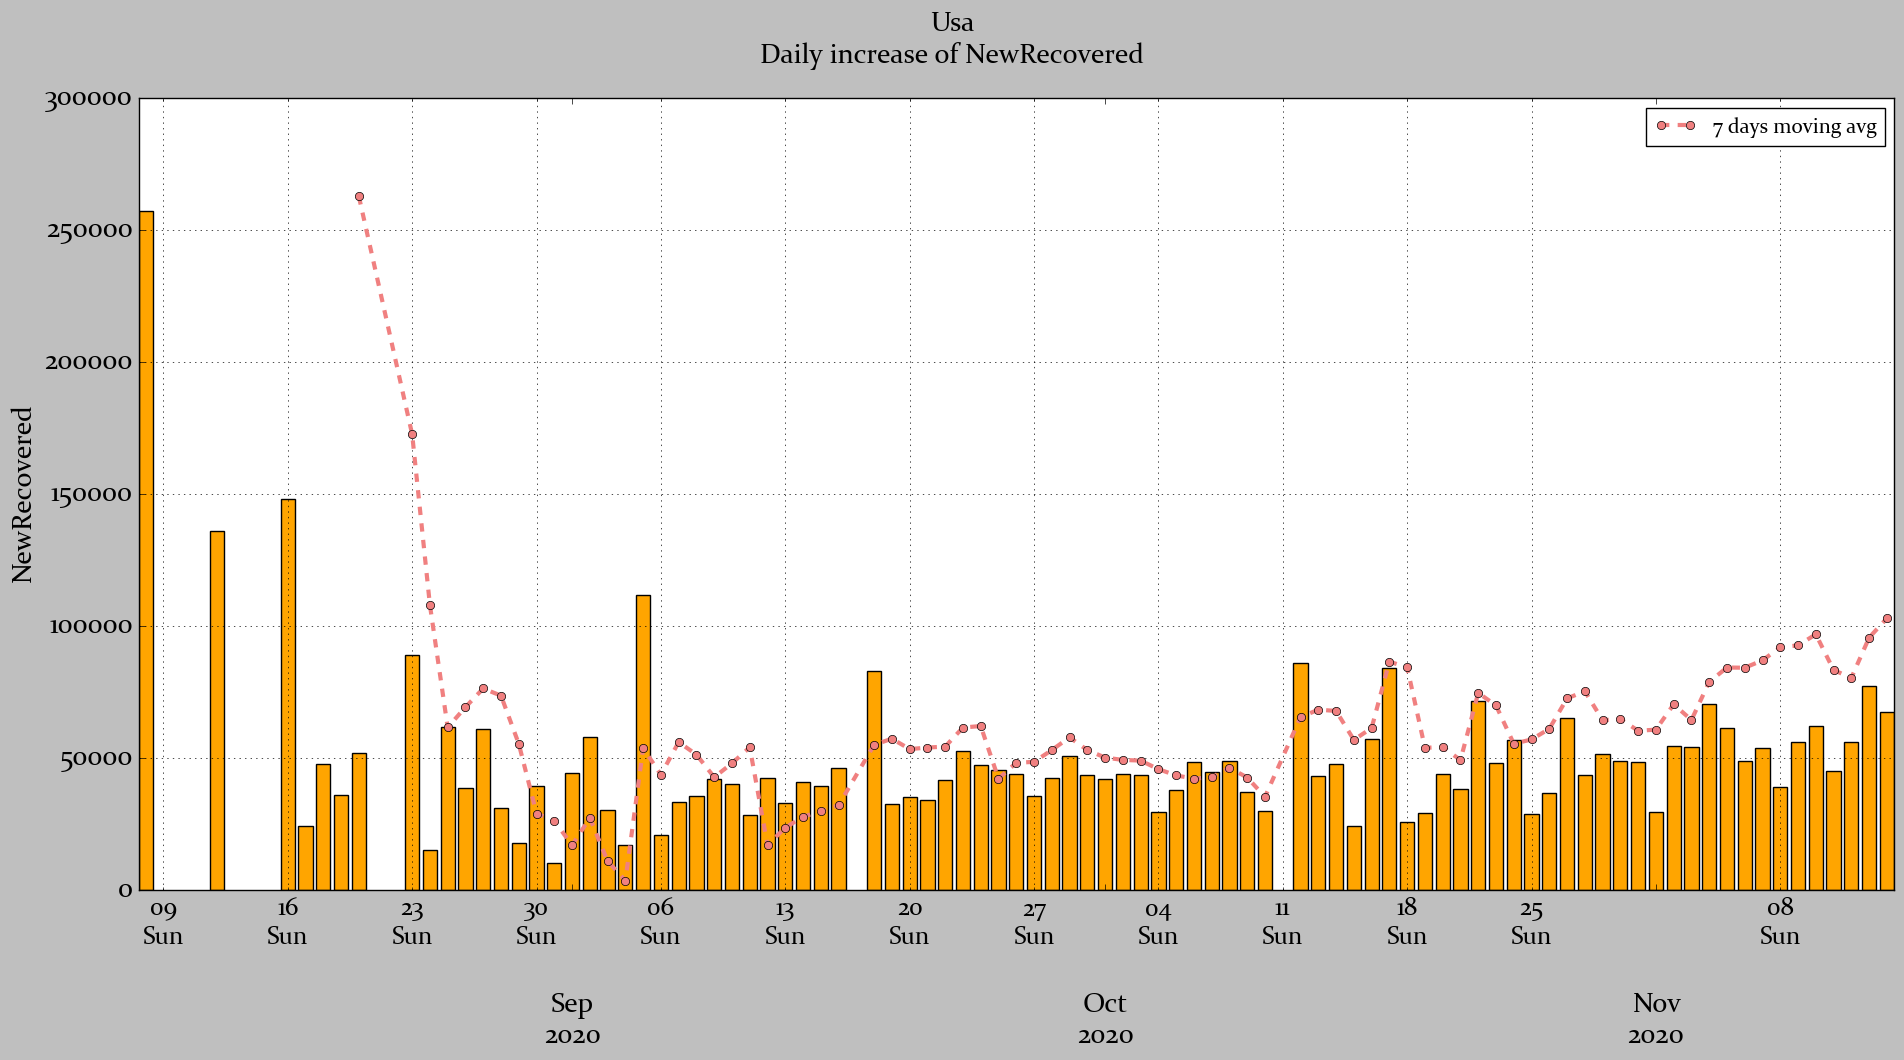

In [12]:
recovered_rate = df['NewRecovered'].pct_change()
country.daily_increase('NewRecovered', save = True)
print('Answer:\n', recovered_rate.tail(5), '\n')

Total time taken in daily_increase function is: 0.00935 minutes.
Answer:
 85    0.417229
86   -0.110941
87    0.255614
88    0.127991
89   -0.121372
Name: NewCases, dtype: float64 



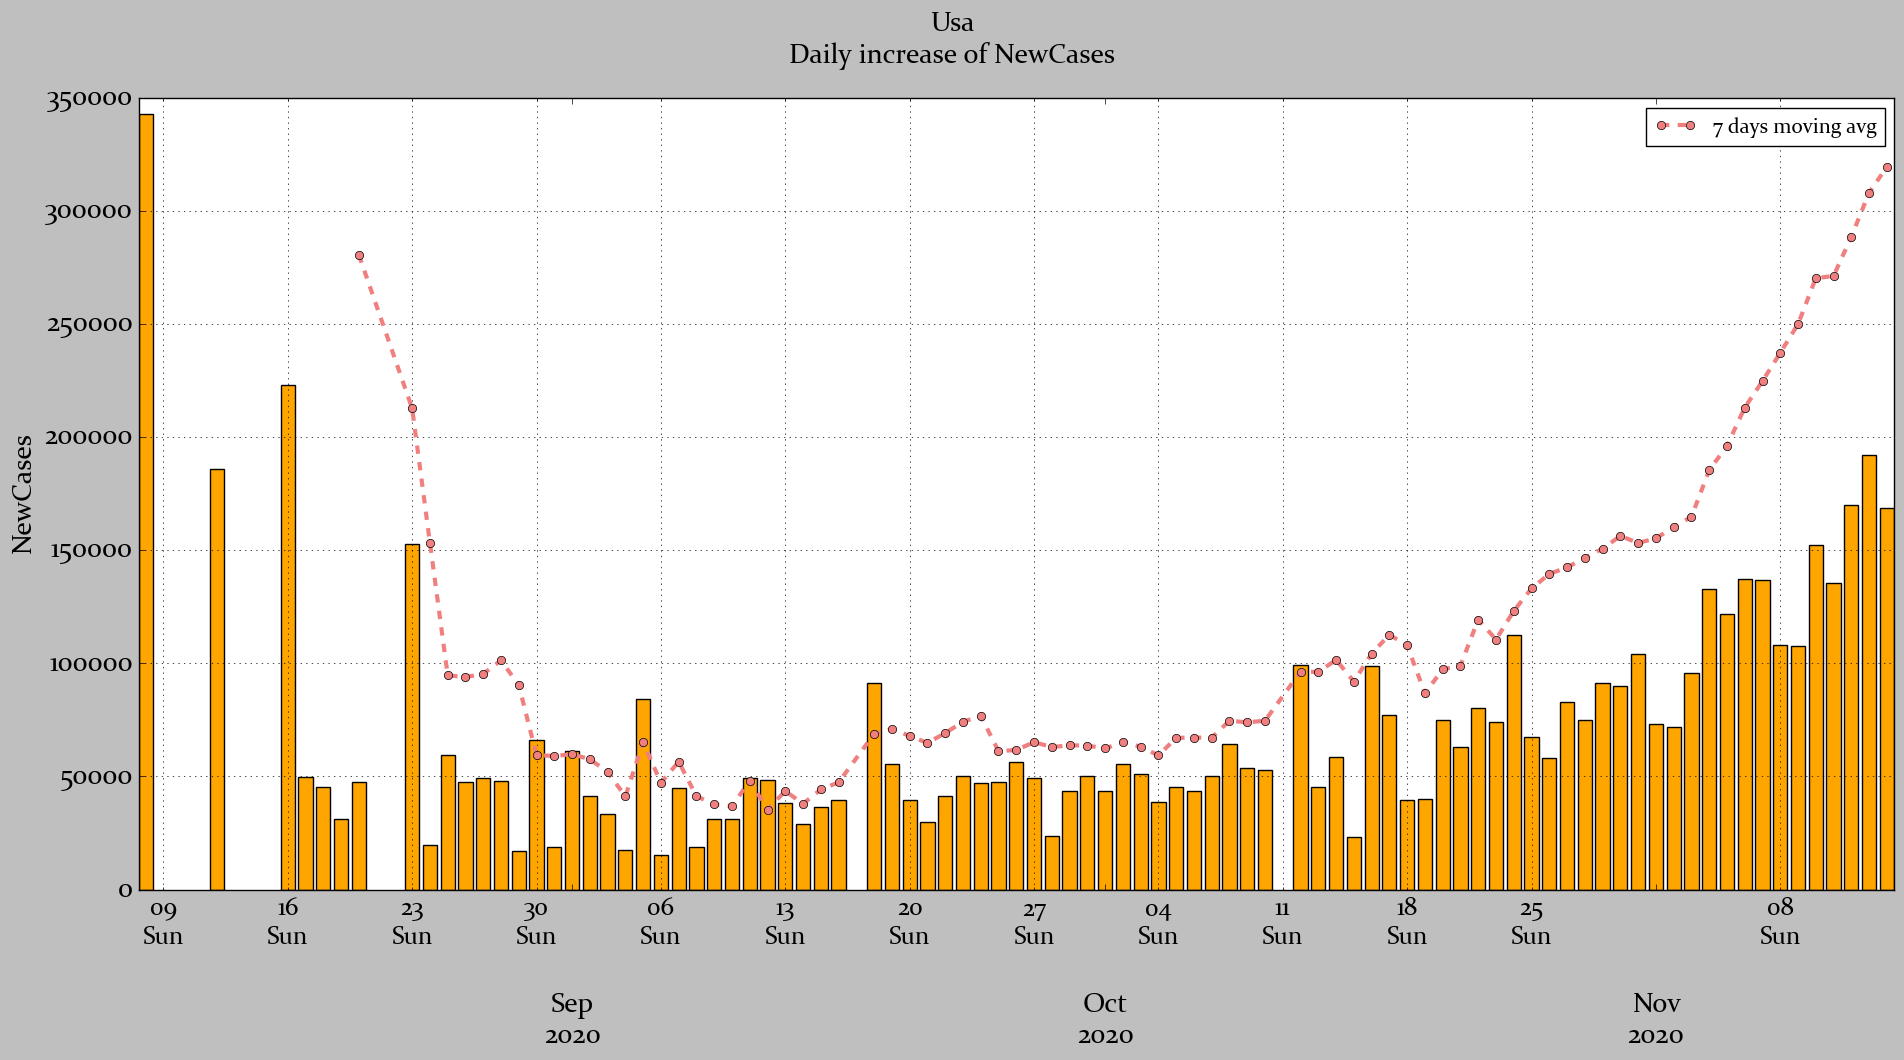

In [13]:
newcase_rate = df['NewCases'].pct_change()
country.daily_increase('NewCases', save = True)
print('Answer:\n', newcase_rate.tail(5), '\n')

Total time taken in daily_increase function is: 0.009283333333333334 minutes.
Answer:
 85    0.024748
86    0.024134
87    0.029912
88    0.029142
89    0.024906
Name: ActiveCases, dtype: float64 



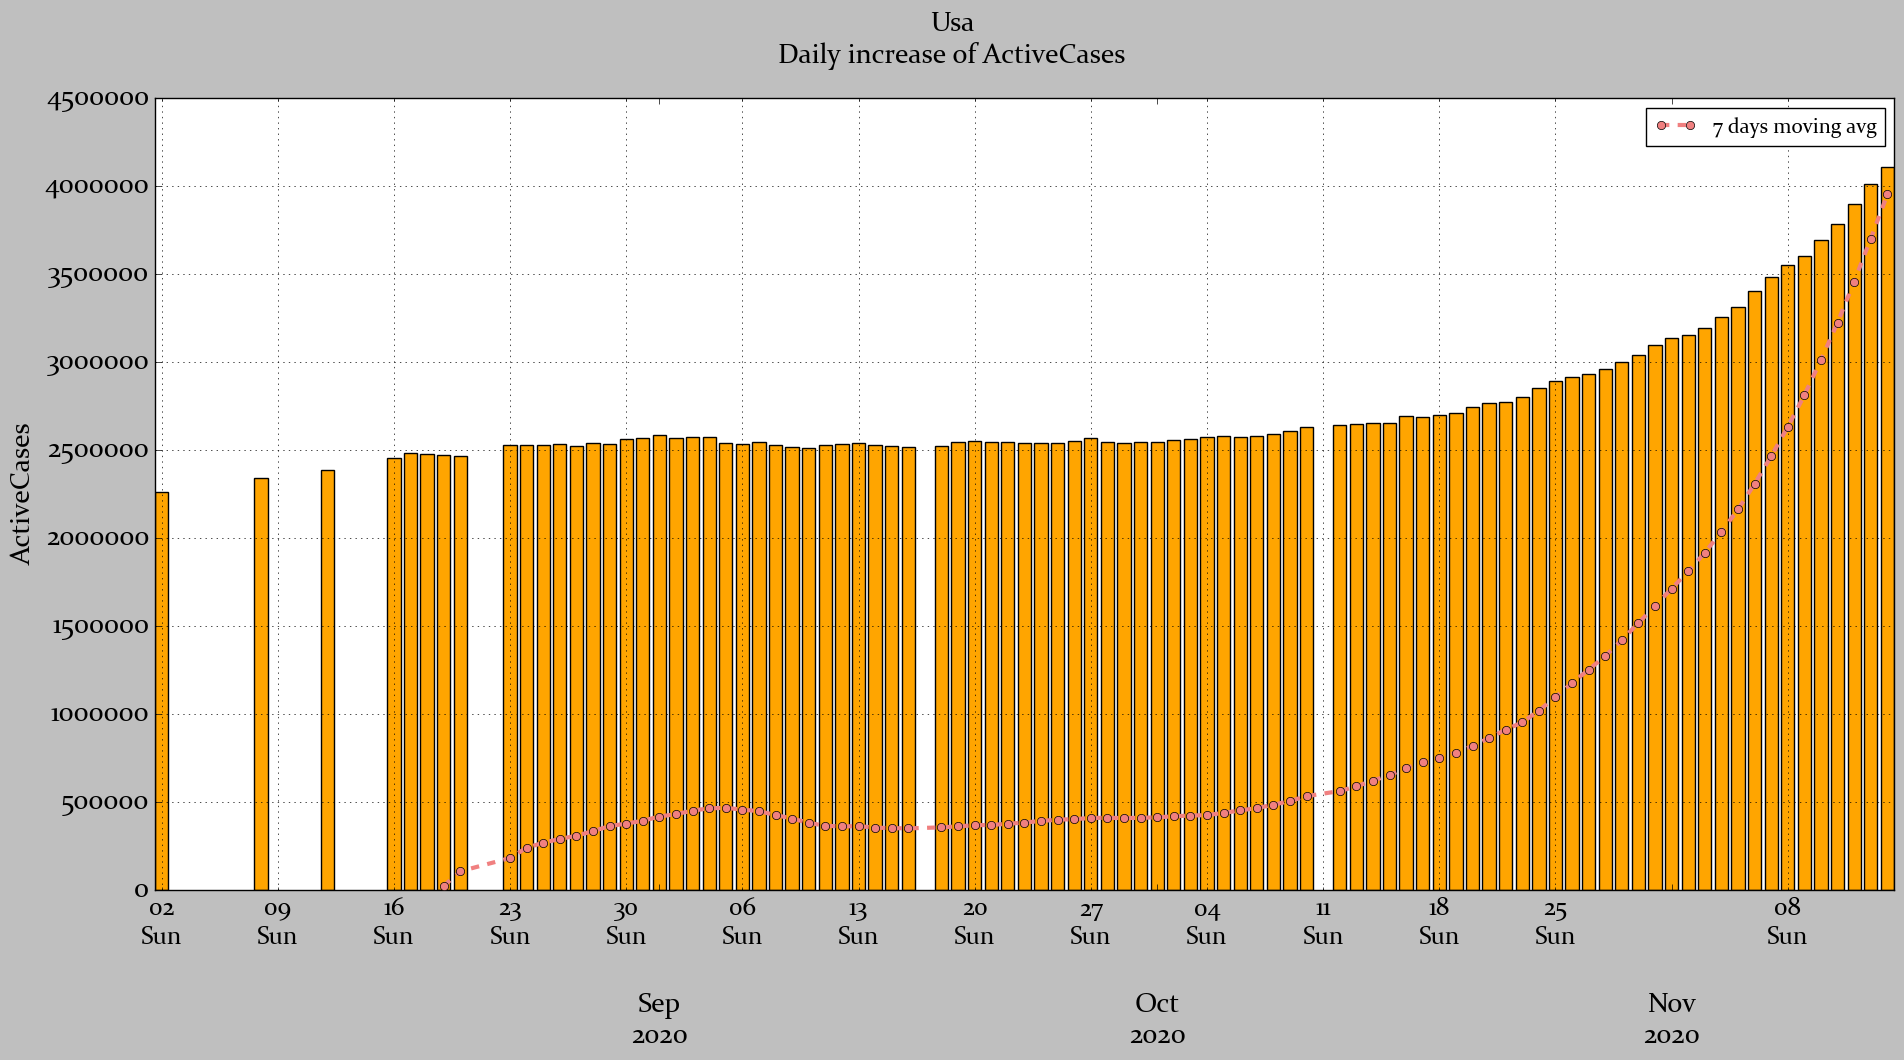

In [14]:
activeCases_rate = df['ActiveCases'].pct_change()
country.daily_increase('ActiveCases', save = True)
print('Answer:\n', activeCases_rate.tail(5), '\n')

Q4.Find closed cases ratio (TotalRecovered + TotalDeaths = TotalCases - ActiveCases)
Total time taken in closed_cases_pie function is: 0.00045 minutes.
Answer:
    TotalRecovered TotalDeaths
89        96.455%      3.545% 



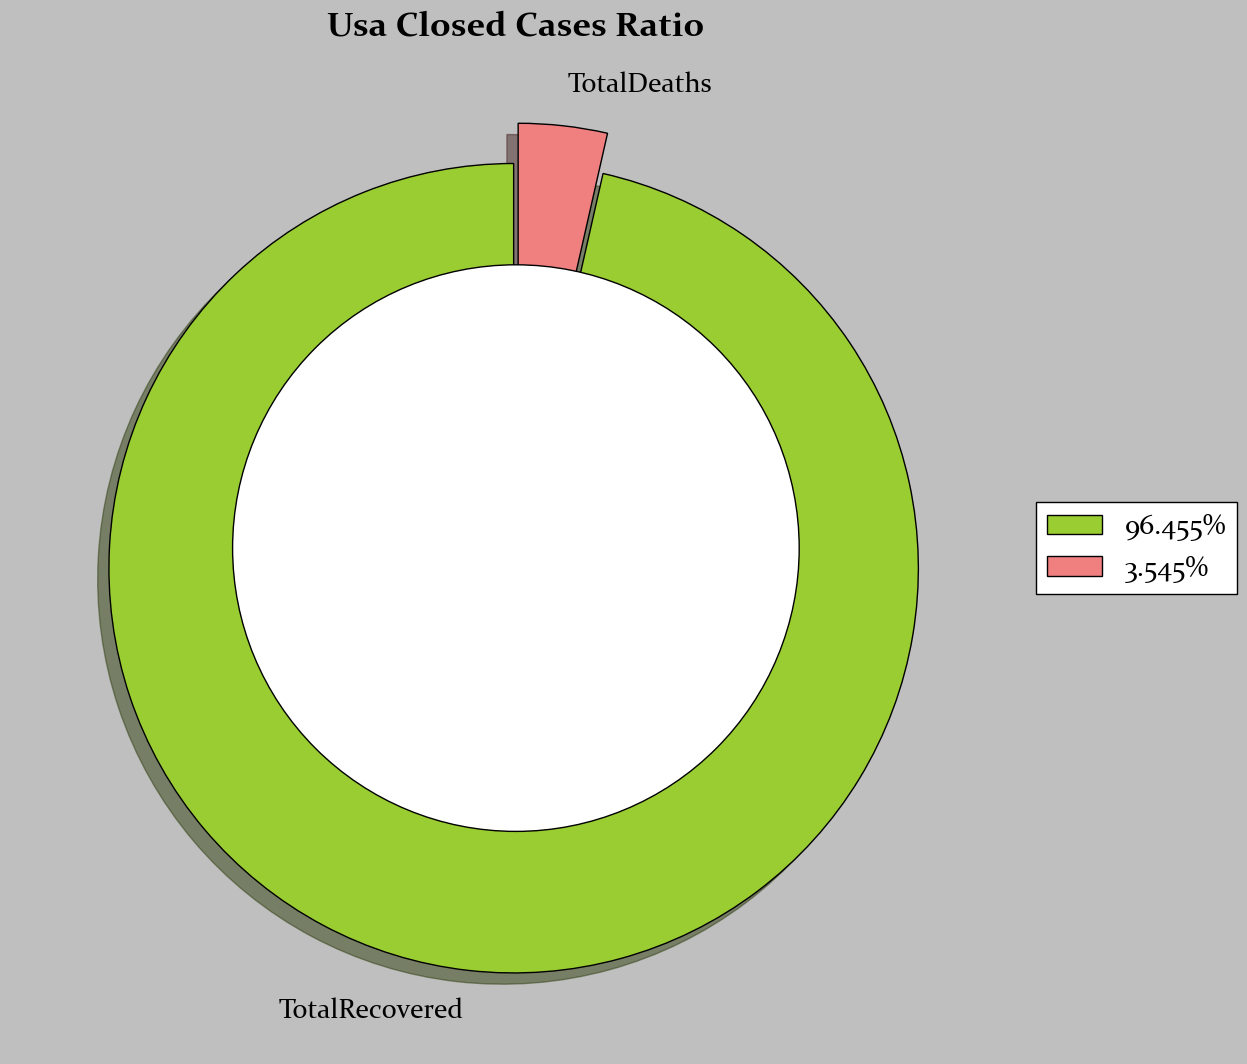

In [15]:
print("Q4.Find closed cases ratio (TotalRecovered + TotalDeaths = TotalCases - ActiveCases)")
updated_totals = df[df['scrap_date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
country.closed_cases_pie()
print('Answer:\n', res, '\n')

In [16]:
print("Q5.Find the countries Case Fatality Ratio")
print('Answer:\n', country.case_fatality_ratio().astype('str') + '%', '\n')

Q5.Find the countries Case Fatality Ratio
Answer:
 4.297% 

